In [1]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

     -------------------------------------- 572.7/572.7 kB 3.6 MB/s eta 0:00:00


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('C:/Users/indhu/Downloads/AAPL.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-07,40.522499,40.560001,40.090000,40.314999,38.261566,87714000
2017-09-08,40.215000,40.287498,39.632500,39.657501,37.637562,114446000
2017-09-11,40.125000,40.512501,39.972500,40.375000,38.318501,126323200
2017-09-12,40.652500,40.990002,39.692501,40.215000,38.166664,286856000
2017-09-13,39.967499,39.990002,39.477501,39.912498,37.879570,179629600
...,...,...,...,...,...,...
2022-08-30,162.130005,162.559998,157.720001,158.910004,158.910004,77906200
2022-08-31,160.309998,160.580002,157.139999,157.220001,157.220001,87991100
2022-09-01,156.639999,158.419998,154.669998,157.960007,157.960007,74229900


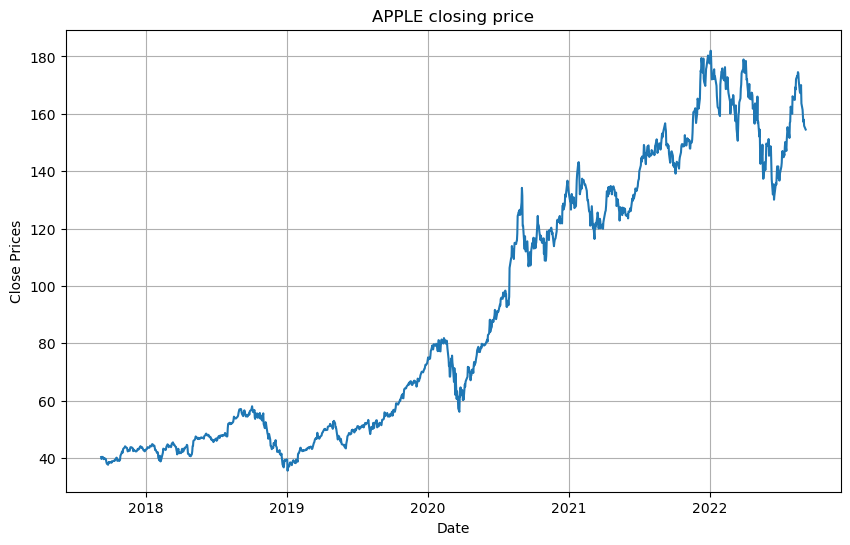

In [4]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('APPLE closing price')
plt.show()


<AxesSubplot:ylabel='Density'>

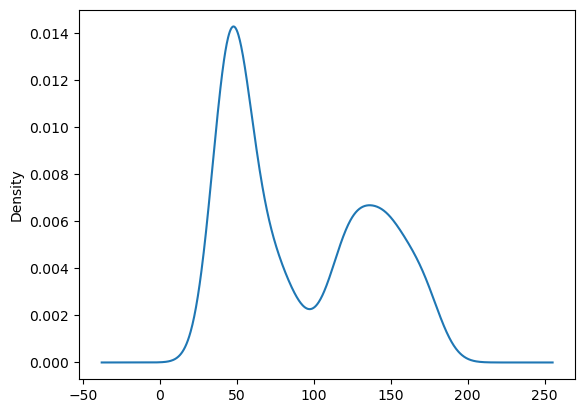

In [5]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')


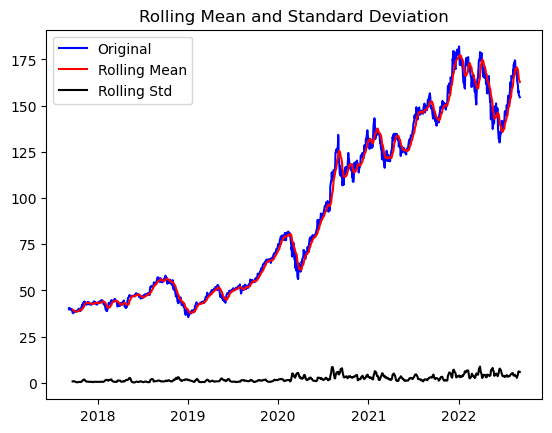

Results of dickey fuller test
Test Statistics                  -0.636594
p-value                           0.862497
No. of lags used                 11.000000
Number of observations used    1246.000000
critical value (1%)              -3.435609
critical value (5%)              -2.863862
critical value (10%)             -2.568006
dtype: float64


In [6]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 640x480 with 0 Axes>

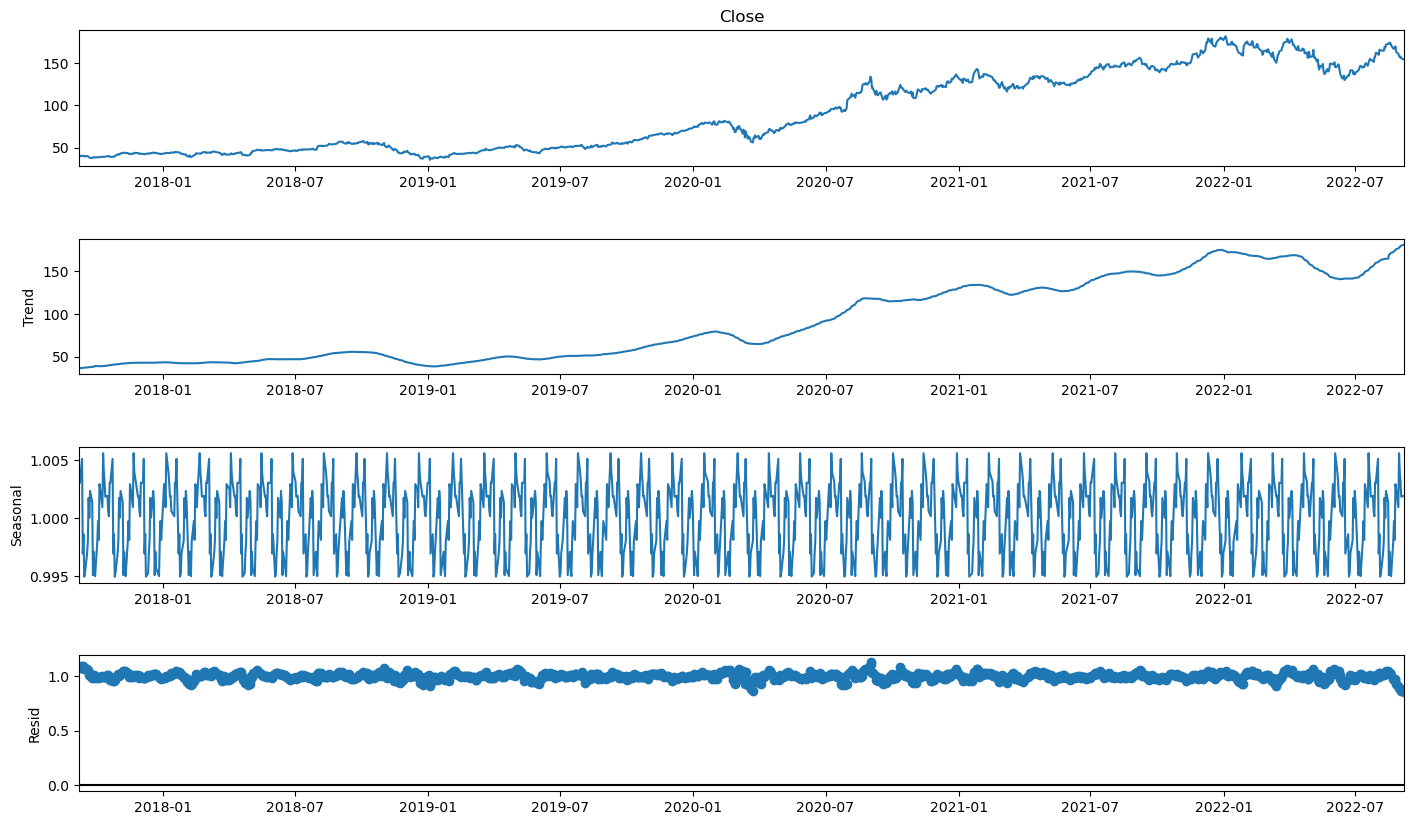

In [17]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative',extrapolate_trend='freq', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


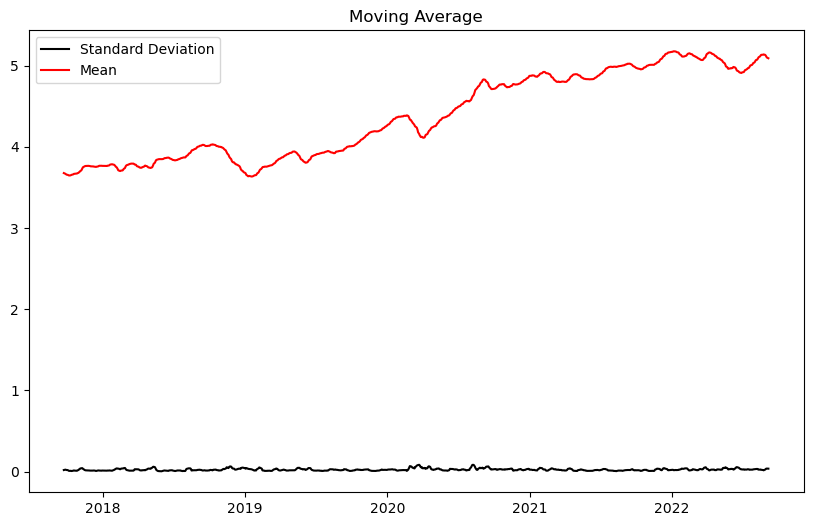

In [18]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


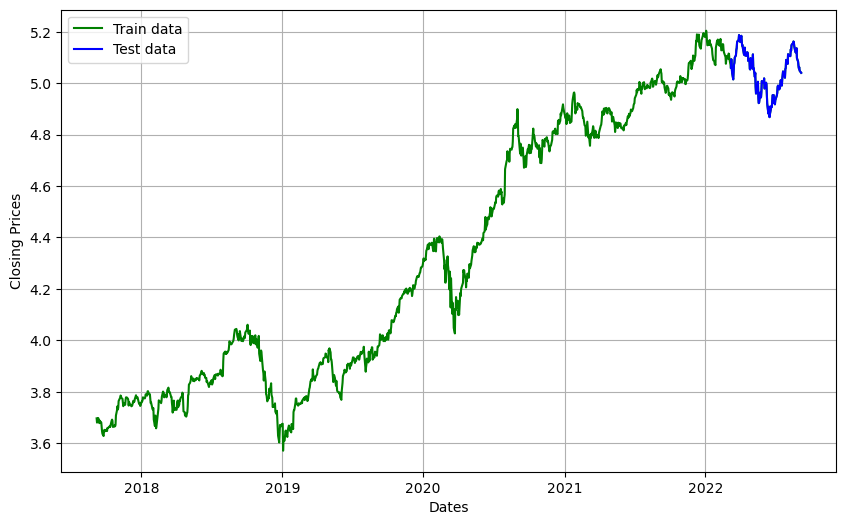

In [230]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5604.687, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5619.080, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5618.441, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5602.553, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5617.331, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5617.388, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5620.220, Time=1.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5613.595, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.95 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5614.751, Time=0.74 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-5615.580, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-5611.866, Time=0.20 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 8.493 seconds
                     

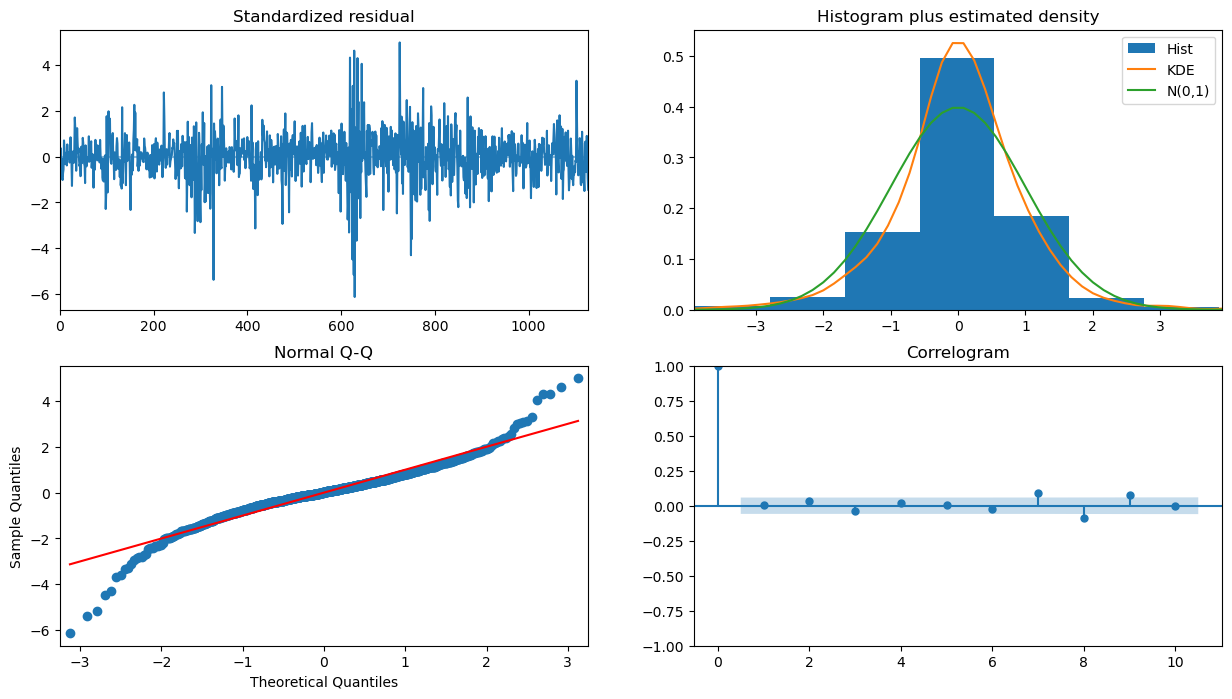

In [20]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [233]:
#Modeling
# Build Model
# Build Model

#from statsmodels.tsa.arima.model import ARIMA

#model = ARIMA(train_data, order=(2,1,1))
#fitted = model.fit()
#print(fitted.summary())

import statsmodels.api as sm

# create your model and fit it
model = sm.tsa.ARIMA(train_data, order=(2,1,1))
fitted = model.fit()

# generate forecast
fc = fitted.forecast(126, alpha=0.05).reset_index(drop=True).values
fc_series = pd.Series(fc, index=test_data.index)

# get the confidence interval
conf_int = fitted.get_forecast(steps=126, alpha=0.05).conf_int()

#conf_int = conf_int.reindex(test_data.index)
lower_series = pd.Series(conf_int['lower Close'].values, index=test_data.index)
upper_series = pd.Series(conf_int['upper Close'].values, index=test_data.index)
print(conf_int['lower Close'])
print(conf_int)
print(lower_series)
#print(test_data)


C:\Users\indhu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\indhu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\indhu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1129    5.034268
1130    5.020718
1131    5.009977
1132    5.000783
1133    4.992656
          ...   
1250    4.683181
1251    4.681589
1252    4.680003
1253    4.678423
1254    4.676850
Name: lower Close, Length: 126, dtype: float64
      lower Close  upper Close
1129     5.034268     5.112804
1130     5.020718     5.125487
1131     5.009977     5.136478
1132     5.000783     5.145560
1133     4.992656     5.153744
...           ...          ...
1250     4.683181     5.463200
1251     4.681589     5.464792
1252     4.680003     5.466378
1253     4.678423     5.467958
1254     4.676850     5.469531

[126 rows x 2 columns]
Date
2022-03-08    5.034268
2022-03-09    5.020718
2022-03-10    5.009977
2022-03-11    5.000783
2022-03-14    4.992656
                ...   
2022-08-30    4.683181
2022-08-31    4.681589
2022-09-01    4.680003
2022-09-02    4.678423
2022-09-06    4.676850
Length: 126, dtype: float64


C:\Users\indhu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\indhu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [237]:
#forecast = fitted.forecast(126, alpha=0.05).reset_index(drop=True)
#fc=forecast.values
#print(forecast.conf_int())

#conf_int = fitted.forecast(126).conf_int(alpha=0.05)
#lower = conf_int[:, 0]
#upper = conf_int[:, 1]
#se = pd.Series(fitted.resid).std() * np.sqrt(len(fitted.resid))
#se = fitted.seasonal_periods * fitted.scale
#se = fitted.forecast(126).reset_index(drop=True).values
#conf = fitted.forecast(126).reset_index(drop=True).values
#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)
#lower_confidence_interval = fc[:, 2]
#upper_confidence_interval = fc[:, 3]
#lower_confidence_interval = np.percentile(forecast, 2.5)
#upper_confidence_interval = np.percentile(forecast, 97.5)

#print("Lower Confidence Interval:", lower_confidence_interval)
#print("Upper Confidence Interval:", upper_confidence_interval)
#lower_series = pd.Series(lower_confidence_interval, index=test_data.index)
#upper_series = pd.Series(upper_confidence_interval, index=test_data.index)
#fc_series = pd.Series(fc, index=test_data.index)
#print(fc)
#print(test_data.index)
#print(con)
#print(conf_int)

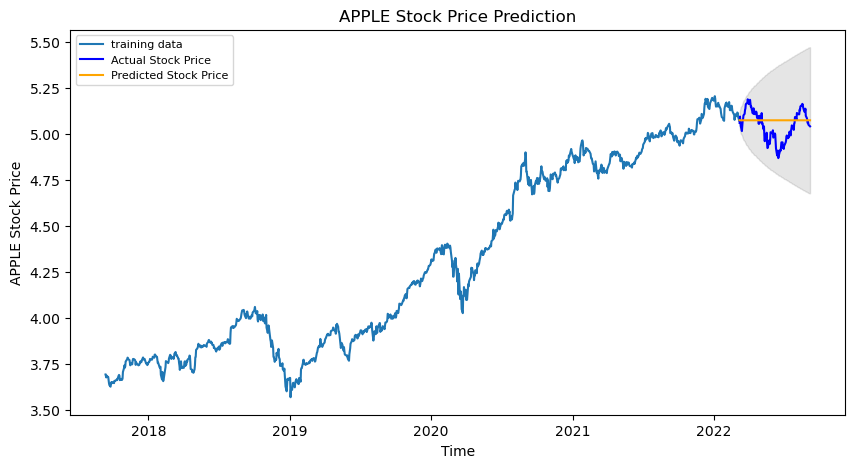

In [235]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [153]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.00716966703201214
MAE: 0.06989302084995459
RMSE: 0.08467388636416862
MAPE: 0.01394371466148316
